## 0.4 Train SVM model

In [1]:
cd ../

/Users/anacriel/plant_seed_classification


In [2]:
import numpy as np
import pandas as pd
import os
import string
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
import src.features.build_features as bf

In [3]:
cd src/

/Users/anacriel/plant_seed_classification/src


In [4]:
dataset = pd.read_csv("data/features_3_10_19.csv")

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

X = dataset.iloc[:, 2:]
X.head(15)
corr = X.corr()
fig, ax = plt.subplots(figsize=(15, 15)) 
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = 1
sns.heatmap(corr, mask=mask, ax=ax, annot= True)
plt.show

<function matplotlib.pyplot.show>

In [6]:
y = dataset.iloc[:,1]
y.head(5)

0    9
1    9
2    9
3    9
4    9
Name: label, dtype: int64

## Cross validational split

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 140) #r state 140

In [9]:
from sklearn import preprocessing

In [10]:
#X_train_std = (X_train - X_train.mean()) / X_train.std()
#X_test_std = (X_test - X_train.mean()) / X_train.std()
scaler = preprocessing.MinMaxScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [11]:
X_train_std

array([[0.43993015, 0.43911741, 0.08333333, ..., 0.44057645, 0.44614701,
        0.32915285],
       [0.08320794, 0.08187755, 0.08333333, ..., 0.62740268, 0.76076959,
        0.4780844 ],
       [0.30099017, 0.10455619, 0.33333333, ..., 0.51735006, 0.47882506,
        0.47449643],
       ...,
       [0.4357874 , 0.43496865, 0.08333333, ..., 0.49868326, 0.33492234,
        0.48574807],
       [0.37284735, 0.37193727, 0.08333333, ..., 0.53285375, 0.46259792,
        0.16410236],
       [0.24984674, 0.24875816, 0.08333333, ..., 0.42065503, 0.4717402 ,
        0.25834122]])

## Applying SVM classifier model

In [12]:
from sklearn import svm

In [13]:
clf = svm.SVC(kernel='rbf', C=2500, gamma=0.25)#700, 0.01, no 'corr'
#kernel='rbf', C=2200, gamma=0.25 mahotas
#kernel='rbf', C=2000, decision_function_shape='ovo', gamma=0.003 -rect -circ
#kernel='rbf', C=800, decision_function_shape='ovo', gamma=0.012 - rect
#kernel='rbf', C=3150, decision_function_shape='ovo', gamma=0.00191
clf.fit(X_train_std, y_train)

SVC(C=2500, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.25, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [14]:
y_pred = clf.predict(X_test_std)

In [15]:
from sklearn import metrics

In [16]:
metrics.f1_score(y_test, y_pred, average='micro')

0.8863157894736842

In [17]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94        86
           1       0.91      0.94      0.92       113
           2       0.86      0.87      0.87       111
           3       0.89      0.94      0.91        67
           4       0.95      0.97      0.96       106
           5       0.92      0.90      0.91        40
           6       0.81      0.73      0.77        48
           7       0.85      0.85      0.85        53
           8       0.92      0.92      0.92       108
           9       0.87      0.82      0.84        55
          10       0.88      0.82      0.85       119
          11       0.72      0.70      0.71        44

    accuracy                           0.89       950
   macro avg       0.87      0.87      0.87       950
weighted avg       0.89      0.89      0.89       950



## GridSearch

#### Doesn't work as good as I expected, have to explore more

In [19]:
def gridSearch(DataSet, LabelSet):
    #define logspace/interval from which c and gamma valuest are computed and saved to a dictionary to be passed as a parameter
    #c from 1e2 to 1e4
    C_range = np.logspace(2, 4, 10)
    #gamma from 1e-2 to 1e2
    gamma_range = np.logspace(-2, 2, 10)
    param_grid = dict(gamma=gamma_range, C=C_range)
    
    cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
    grid = GridSearchCV(svm.SVC(), param_grid=param_grid, cv=cv, n_jobs=1)
    grid.fit(DataSet, LabelSet)
    
    return grid

In [ ]:
svm_grid = gridSearch(X_train_std, y_train)

In [ ]:
y_pred_svm_grid = svm_grid.predict(X_test_std)

In [ ]:
metrics.f1_score(y_test, y_pred_svm_grid, average='micro')

In [ ]:
svm_grid.best_params_

## Save model

In [18]:
import pickle

In [19]:
# save the classifier
with open('../models/svm_3_10_19.pkl', 'wb') as fid:
    pickle.dump(clf, fid) 

## Checking test images

In [20]:
import src.visualization.visualize as vs
import src.features.build_features as bfeatures
import cv2
from matplotlib import pyplot as plt
from src.data.make_dataset import create_dataset

In [21]:
data_dir = '../data/raw/'
test_image_dir = os.path.join(data_dir, 'test')

In [22]:
images, titles = vs.read_images(test_image_dir, data_type='test')

794


In [23]:
features_of_img = create_dataset(images, titles, kind='title')

/Users/anacriel/miniconda3/lib/python3.6/site-packages/skimage/morphology/misc.py:132: UserWarning: Only one label was provided to `remove_small_objects`. Did you mean to use a boolean array?
  warn("Only one label was provided to `remove_small_objects`. "


In [24]:
features_of_img.drop(columns='title', inplace=True)
#features_of_img.drop(columns=['med_r', 'med_g', 'med_b', 'entropy', 'contrast', 'correlation', 'inverse_diff_moments'], inplace=True)

In [25]:
features_of_img.head(5)

,area,largest_area,number_of_elems,perimeter,aspect_ratio,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,skew_r,skew_g,skew_b
0,10518.0,10518.0,1,949.234624,1.073864,85.667082,66.520789,78.708031,27.988435,6.472557,7.376595,8.630450,1.386845,-1.300138,0.315054
0,1608.0,956.0,2,498.132030,0.402516,154.313134,63.693917,68.225791,37.100730,9.951622,7.456777,10.018381,1.157437,0.224095,0.525300
0,10166.5,10166.5,1,543.629504,1.927083,29.069300,68.862994,83.189982,30.327372,6.834141,8.523858,8.733644,-0.113649,-1.494380,0.229945
0,6128.0,6128.0,1,536.783833,0.724868,47.019726,69.547315,82.263266,35.556763,6.966410,8.809231,11.671117,0.769094,-0.187278,-0.348267
0,16510.5,16510.5,1,987.418388,0.984293,59.053031,58.101742,71.783761,32.548627,5.755955,6.157370,10.323008,0.536335,-1.126607,-0.779185


In [26]:
#features_of_img = (features_of_img - X_train.mean()) / X_train.std()
features_of_img = scaler.transform(features_of_img)

In [27]:
y_test_pred = clf.predict(features_of_img)

In [28]:
y_test_pred[0]

6

In [29]:
len(titles)

794

In [30]:
len(features_of_img)

794

In [31]:
cols = {'file':titles, 'species':y_test_pred}

In [32]:
submission_df = pd.DataFrame(data=cols)

In [33]:
submission_df.iloc[520]

file       e721c6ac8.png
species               10
Name: 520, dtype: object

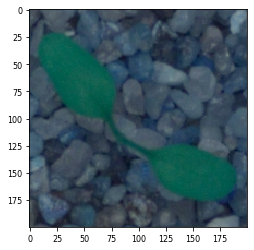

In [34]:
plt.imshow(images[791])

In [35]:
features_of_img

array([[0.39079307, 0.38990902, 0.08333333, ..., 0.63105425, 0.31459976,
        0.37537758],
       [0.05974475, 0.0341203 , 0.16666667, ..., 0.59299311, 0.53930372,
        0.40928918],
       [0.37773319, 0.3768302 , 0.08333333, ..., 0.38210748, 0.2859645 ,
        0.36164991],
       ...,
       [0.27646807, 0.27541813, 0.08333333, ..., 0.44663451, 0.31446652,
        0.6219286 ],
       [0.46532538, 0.4645495 , 0.08333333, ..., 0.62983039, 0.45983841,
        0.29117944],
       [0.25038548, 0.24929769, 0.08333333, ..., 0.62989926, 0.54110105,
        0.27868997]])

In [36]:
submission_df

,file,species
0,1b490196c.png,6
1,85431c075.png,10
2,506347cfe.png,2
3,7f46a71db.png,0
4,668c1007c.png,3
...,...,...
789,456d507c0.png,9
790,78b1bf91a.png,0
791,8cf2e3e6c.png,8
792,948cdb277.png,9


In [37]:
submission_df.to_csv("data/submission_3_10_19.csv")

In [38]:
mapping = { 'Sugar beet': 0, 'Fat Hen': 1, 'Scentless Mayweed' : 2, 'Charlock' : 3,
           'Small-flowered Cranesbill': 4, 'Maize': 5, 'Shepherds Purse' :6, 'Common wheat': 7,
           'Common Chickweed': 8, 'Cleavers': 9, 'Loose Silky-bent' : 10, 'Black-grass': 11 }

In [39]:
mapping_rev = {v : k for k, v in mapping.items()}

In [40]:
mapping_rev

{0: 'Sugar beet',
 1: 'Fat Hen',
 2: 'Scentless Mayweed',
 3: 'Charlock',
 4: 'Small-flowered Cranesbill',
 5: 'Maize',
 6: 'Shepherds Purse',
 7: 'Common wheat',
 8: 'Common Chickweed',
 9: 'Cleavers',
 10: 'Loose Silky-bent',
 11: 'Black-grass'}

In [41]:
submission_df.species.replace(mapping_rev, inplace=True); submission_df

,file,species
0,1b490196c.png,Shepherds Purse
1,85431c075.png,Loose Silky-bent
2,506347cfe.png,Scentless Mayweed
3,7f46a71db.png,Sugar beet
4,668c1007c.png,Charlock
...,...,...
789,456d507c0.png,Cleavers
790,78b1bf91a.png,Sugar beet
791,8cf2e3e6c.png,Common Chickweed
792,948cdb277.png,Cleavers


In [42]:
submission_df.to_csv("submission.csv", index=False)